In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/project/flood_v8.zip'
extracted_dir_path = '/content/data'
!unzip "$zip_file_path" -d "$extracted_dir_path"

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/project/yolov8/best.pt')

In [ ]:
metrics = model.val()
metrics.box.map    # map50-95
metrics.box.map50

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/data/flood_v8/roboflow/valid/labels.cache... 156 images, 0 backgrounds, 5 corrupt: 100%|██████████| 156/156 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/data/flood_v8/roboflow/valid/images/20210323_image_1280x720_e109a0c1-ca75-410a-838c-5240927bbbaf_600x_jpg.rf.ae6ef21fef5c28f3ad13454eeef41449.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1363]
val: WARNING ⚠️ /content/data/flood_v8/roboflow/valid/images/Floods-Eid-Sacrifice-Animals-prices-huge-increase-upto-100_jpg.rf.11270ed4ffab3a6d7577704b91aecc97.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0014]
val: WARNING ⚠️ /content/data/flood_v8/roboflow/valid/images/Y3EDN3L4FZOY3JDTE3T42WIKOY_jpg.rf.ccb55c1f0c816b0220d2c05cbc93bf90.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/data/flood_v8/roboflow/valid/images/_85193857_kangaroo2_jpg.rf.ca4ac7cf8bbe574fd2c01e92d6ed17ea.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0912]
val: WARNING ⚠️ /content/data/flood_v8/roboflow/valid/images/images288_jpg.rf.fb0fd1599de4651257e350ec125f40c9.jp


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [06:01<00:00, 36.20s/it]


                   all        151        558      0.717      0.593      0.644      0.334
                animal        151        194      0.702      0.582      0.612      0.323
                person        151        364      0.731      0.604      0.676      0.346
Speed: 11.2ms preprocess, 2362.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val4


0.6440156501818853

In [ ]:
results = model.train(data="/content/data/flood_v8/roboflow/data.yaml", epochs=100)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

RuntimeError: Dataset '/content/data/data.yaml' error ❌ '/content/data/data.yaml' does not exist

In [ ]:
model.predict("/content/data/flood_v8/roboflow/test/images/230710-Pushkar-India-camel-street-flood-ac-1046p-66e6c1_jpg.rf.5638eaac7a9f4f5d12da5ded3d797000.jpg", save=True)

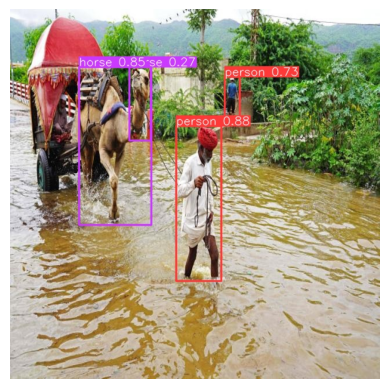

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = "/content/runs/detect/predict/230710-Pushkar-India-camel-street-flood-ac-1046p-66e6c1_jpg.rf.5638eaac7a9f4f5d12da5ded3d797000.jpg"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
